 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5607) </b> </h1> </center>

<b> Programming Assignment - 05 - Isolated digit recognition using Dynamic Time Warping (DTW) algorithm </b>

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Assignment on Dynamic Time Warping </b> <br>
We expect you to code the dynamic time warping algorithm from scratch in this programming assignment. The skeleton code is provided for you to understand the algorithm. At the end of the assignment, you need to write an algorithm to perform an isolated digit recognition task using Dynamic Time Warping (DTW) codes. Isolated digit recognition is the task of recognizing the digit from the test speech signal having a single digit in isolation. 

In [1]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

**Part1**

In this part of the assignment, you need to code the DTW algorithm from scratch. 

1. Given two templates, Write a dynamic time warping algorithm to obtain the optimal distance between them.

> Compute the distance matrix between the two templates 


> Compute the accumulative distance matrix


> Backtrack from the accumulative distance matrix to get the optimal path and thereby compute the optimal distance   


> Plot the optimal path on both the distance matrix and cumulative distance matrix to verify the DTW codes



In [2]:
###########################################################
#Function to obtain the optimal distance and path between two templates
###########################################################
def eucl(t1, t2):
  return np.linalg.norm(t1-t2)

def cosine(t1, t2):
  return np.dot(t1, t2)/(np.linalg.norm(t1)*np.linalg.norm(t2))

def DTW(template1,template2, distance_func=eucl, met="min"): 
    #######################################################
    # Input  : Two templates 
    # Output : DTW path and optimal distance 
    #######################################################

    M = template1.shape[1]
    N = template2.shape[1]

    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################
    # Initialize the cumulative distance matrix
    D = np.zeros((M, N))
    for i in range(M):
      for j in range(N):
        D[i, j] = distance_func(template1[:, i], template2[:, j])
      
    DTW_cumulate_Matrix = np.ones((M, N))*np.inf # cummulative distance matrix
    P = np.zeros((M, N)).astype(int)
    DTW_cumulate_Matrix[0, 0] = D[0, 0]

    for i in range(1, M):
      DTW_cumulate_Matrix[i, 0] = D[i, 0] + DTW_cumulate_Matrix[i-1, 0]

    for j in range(1, N):
      DTW_cumulate_Matrix[0, j] = D[0, j] + DTW_cumulate_Matrix[0, j-1]

    #Iterate through the sequence of features in templates and compute the distance between the templates.
    for i in range(1, M): #you can start from 1 
        for j in range(1, N):
            current_distance = D[i, j]  # Compute the euclidean distance between the current feature vectors
            
            m = eval(met+"({}, {}, {})".format(DTW_cumulate_Matrix[i-1, j-1], DTW_cumulate_Matrix[i-1, j], DTW_cumulate_Matrix[i, j-1]))
            
            DTW_cumulate_Matrix[i, j] = current_distance + m
            #Add min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]) to "current_distance" and assign it to "DTW_cumulate_Matrix[i,j]"

    # #######################################################
    # # Code snippet to find the optimal DTW path and the corresponding optimal distance
    # #######################################################

    i = M-1
    j = N-1
    path = [[i, j]]
    opt_dist = DTW_cumulate_Matrix[M-1, N-1]
    while i>0 and j>0:
      if i==0:
        j -= 1
      elif j==0:
        i -= 1
      else:
        if DTW_cumulate_Matrix[i-1, j-1] <= DTW_cumulate_Matrix[i-1, j] and DTW_cumulate_Matrix[i-1, j-1] <= DTW_cumulate_Matrix[i, j-1]:
          i -= 1
          j -= 1
        elif DTW_cumulate_Matrix[i-1, j] <= DTW_cumulate_Matrix[i-1, j-1] and DTW_cumulate_Matrix[i-1, j] <= DTW_cumulate_Matrix[i, j-1]:
          i -= 1
        else:
          j -= 1
      path.append([i, j])


    return path[::-1], opt_dist, D, DTW_cumulate_Matrix



def plotDTWpath(template1,template2, distance_func=eucl, met="min"):
    #######################################################
    # Inputs : template1 and template2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix 
    #######################################################

    #Compute distance and cumulative distance between the given templates

    path, _, D, cum = DTW(template1, template2, distance_func=eucl, met="min")
    px = [x[0] for x in path]
    py = [y[1] for y in path]
    #Obtain the optimal path using "DTW" function
    plt.figure()
    plt.title("Distance matrix")
    plt.imshow(D, interpolation="nearest", cmap="Reds")
    plt.gca().invert_yaxis()
    plt.xlabel("template 2")
    plt.ylabel("template 1")
    plt.plot(py, px)
    plt.grid()
    plt.colorbar();


    plt.figure()
    plt.title("Cummulative matrix")
    plt.imshow(cum, interpolation="nearest", cmap="Reds")
    plt.gca().invert_yaxis()
    plt.xlabel("template 2")
    plt.ylabel("template 1")
    plt.plot(py, px)
    plt.grid()
    plt.colorbar();

    #Plot the optimal path on distance and cumulative matrices and verify the DTW code

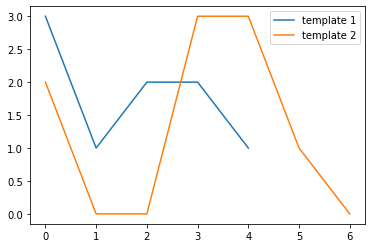

In [3]:
t1 = np.array([3, 1, 2, 2, 1])
t2 = np.array([2, 0, 0, 3, 3, 1, 0])


plt.figure()
plt.plot(t1, label="template 1")
plt.plot(t2, label="template 2")
plt.legend()
plt.show()


path, opt_dist, D, cum = DTW(t1.reshape(1, -1), t2.reshape(1, -1), met="min")

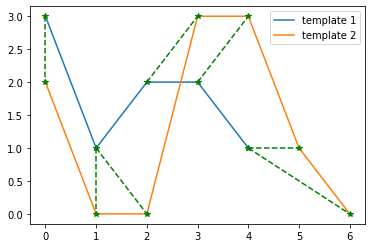

In [4]:
maps = []
for i, p in enumerate(path):
  maps.append([[p[0], p[1]], [t1[p[0]], t2[p[1]]]])


plt.figure()
plt.plot(t1, label="template 1")
plt.plot(t2, label="template 2")
for i in range(len(maps)):
  plt.plot(maps[i][0], maps[i][1], "--g*")
plt.legend()
plt.show()

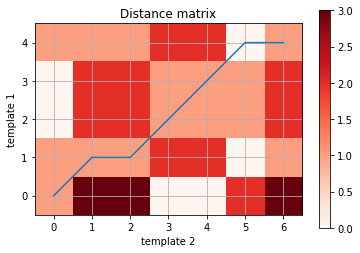

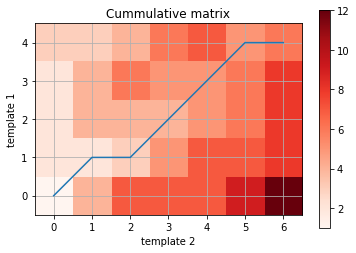

In [5]:
plotDTWpath(t1.reshape(1, -1), t2.reshape(1, -1))


**Part2**

In this part of the assignment, we expect you to build the isolated digit recognition system with the help of the above written DTW algorithm 

1. Record one repetition each of digits zero,one,two,three,four,five,six,seven,eight and nine. The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes.
2. Record three further repetitions of the same digits (isolated words) as test data.  
3. The codes to compute the signal's templates ( Mel Frequency Cepstral Coefficients ) are provided. Please use them to obtain the templates of the speech signals.   
4. Write an algorithm to perform isolated word recognition with the help of the DTW codes
5. Take two pairs such that one pair is the repetition of the same digit and another one is two different digits. Plot the optimal DTW path on distance and cumulative distance matrices for both cases.   
6. Evaluate the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts. 
7. Create a confusion matrix and report the most confusing digits. 


**Code to compute the signal's templates i.e Mel Frequency Cepstral Coefficients**

In [6]:
!pip install python_speech_features
!pip install speechpy

  Created wheel for python-speech-features: filename=python_speech_features-0.6-py3-none-any.whl size=5888 sha256=e5aaa1b8f3fc5f80f65b280968e59b2f443fcf5c646928f2584747b220edcb4b
  Stored in directory: /root/.cache/pip/wheels/b0/0e/94/28cd6afa3cd5998a63eef99fe31777acd7d758f59cf24839eb
Successfully built python-speech-features


In [7]:
import scipy.io.wavfile as wav
import scipy.signal as sps
from python_speech_features import mfcc
import speechpy

def MFCC(wavfile):
  ###########################
  # Input  : Signal of length t
  # Output : Templates of size (T,30) where T is the number of frames and 30 is dimension of the feature for each frame
  ###########################
  (rate,sig) = wav.read(wavfile)
  if rate != 16000:
    number_of_samples = round(len(sig) * float(16000) / rate)
    sig = sps.resample(sig, number_of_samples)

  sig=sig-np.mean(sig)
  mfcc_feat=mfcc(sig,16000,numcep=30,winlen=0.025,winstep=0.01,nfilt=30,lowfreq=20,highfreq=7600,winfunc=np.hamming)
  mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
  return mfcc_feat_cmvn.T

In [11]:
from google.colab import drive
import os
import soundfile as sf

drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
bacground_data_location='/content/drive/My Drive/PRML/Assignment_5/data1/' 
train_data_files=[]
test_data_files=[]

for root, dirs, files in os.walk(bacground_data_location):
  for file in files:
    if file.endswith("0.wav"):
      train_data_files.append(os.path.join(root, file))
    else:
      test_data_files.append(os.path.join(root, file))

train_data = dict()
classes = ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]

for c in classes:
  train_data[c]= []

f = [x.split(".wav")[0].split("/")[-1].split("_")[0] for x in train_data_files]

for i, (filename, cls) in enumerate(zip(train_data_files, f)):
  train_data[cls].append(filename)
print("Train data:- ", train_data)

test_data = dict()
classes = ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]

for c in classes:
  test_data[c]= []

f = [x.split(".wav")[0].split("/")[-1].split("_")[0] for x in test_data_files]

for i, (filename, cls) in enumerate(zip(test_data_files, f)):
  test_data[cls].append(filename)
print("Test data:- ", test_data)

Train data:-  {'zero': ['/content/drive/My Drive/PRML/Assignment_5/data1/zero_0.wav'], 'one': ['/content/drive/My Drive/PRML/Assignment_5/data1/one_0.wav'], 'two': ['/content/drive/My Drive/PRML/Assignment_5/data1/two_0.wav'], 'three': ['/content/drive/My Drive/PRML/Assignment_5/data1/three_0.wav'], 'four': ['/content/drive/My Drive/PRML/Assignment_5/data1/four_0.wav'], 'five': ['/content/drive/My Drive/PRML/Assignment_5/data1/five_0.wav'], 'six': ['/content/drive/My Drive/PRML/Assignment_5/data1/six_0.wav'], 'seven': ['/content/drive/My Drive/PRML/Assignment_5/data1/seven_0.wav'], 'eight': ['/content/drive/My Drive/PRML/Assignment_5/data1/eight_0.wav'], 'nine': ['/content/drive/My Drive/PRML/Assignment_5/data1/nine_0.wav']}
Test data:-  {'zero': ['/content/drive/My Drive/PRML/Assignment_5/data1/zero_1.wav', '/content/drive/My Drive/PRML/Assignment_5/data1/zero_2.wav', '/content/drive/My Drive/PRML/Assignment_5/data1/zero_3.wav'], 'one': ['/content/drive/My Drive/PRML/Assignment_5/data

**Algorithm to perform isolated digit recognition**

In [21]:
def isolated_digit_recognition(train_data, test_data, distance_func=cosine, met="max",frac=1.0):
  classes = train_data.keys()
  preds = dict()
  for i, c1 in enumerate(classes):
    preds[c1] = []
    for k in range(int(frac*len(test_data[c1]))):
      x = []
      for j, c2 in enumerate(classes):
        path, distance, D, cum  = DTW(MFCC(train_data[c1][0]), MFCC(test_data[c2][k]), distance_func=distance_func, met=met)
        x.append(distance)
      preds[c1].append(x)
  return preds

In [40]:
preds = isolated_digit_recognition(train_data, test_data)

**Plot the optimal DTW path**

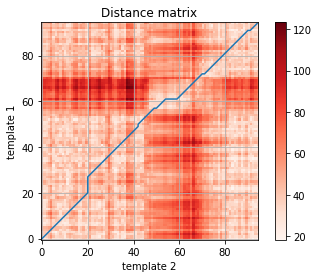

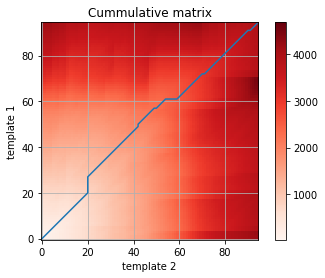

In [ ]:
plotDTWpath(MFCC(train_data['two'][0]), MFCC(test_data['two'][2]), distance_func=cosine, met="min")

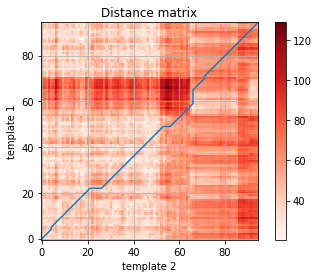

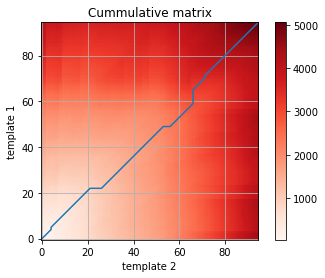

In [ ]:
plotDTWpath(MFCC(train_data['two'][0]), MFCC(test_data['seven'][0]), distance_func=cosine, met="min")

**Compute the required metrics ( digit recognition accuracy ) and illustrations ( confusion matrix )**

In [41]:
def get_metrics(preds, met="min", plot=False):
  classes = preds.keys()
  n = len(classes)
  CM = np.zeros((n, n)).astype(int)
  for i, c in enumerate(classes):
    for pred in preds[c]:
      p_idx = eval("np.arg{}({})".format(met, pred))
      # print(p_idx) 
      CM[i, p_idx] += 1
  acc = 100*np.sum(np.diag(CM))/np.sum(CM)

  if plot:
    plt.figure(figsize=(10, 8))
    plt.title("Confusion matrix")
    im = plt.imshow(CM, interpolation="nearest", cmap="Blues")
    for i in range(n):
      for j in range(n):
        plt.text(x=j, y=i, s=CM[i, j], va="center", ha="center")
    plt.xlabel("Prediction")
    plt.xticks(np.arange(10))
    plt.ylabel("True")
    plt.yticks(np.arange(10))
    plt.colorbar();
  return acc, CM

## COSINE distance

Accuracy = 90.0%


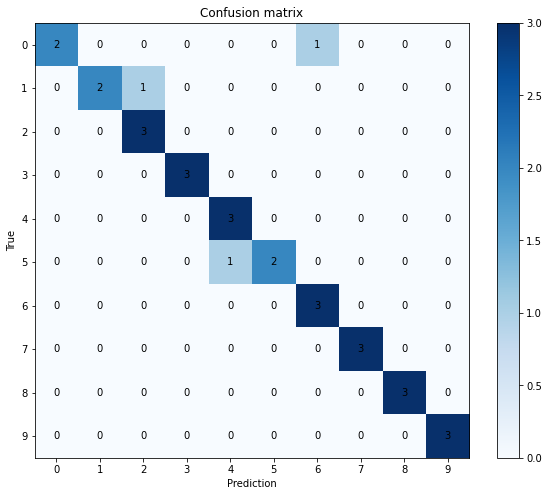

In [42]:
acc, _ = get_metrics(preds, met="max", plot=True);

print("Accuracy = {}%".format(np.round(acc, 2)))

# EUCLIDEAN distance

Accuracy = 86.67%


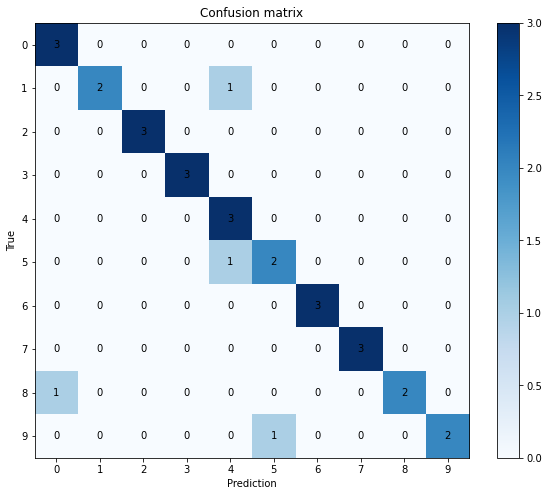

In [44]:
preds = isolated_digit_recognition(train_data, test_data, distance_func=eucl, met="min")

acc, _ = get_metrics(preds, met="min", plot=True);

print("Accuracy = {}%".format(np.round(acc, 2)))

# Report
1. Using COSINE distance accuracy was 90% and EUCLIDEAN distance is 86.67%, Clearly COSINE is a better metric than EUCLIDEAN.
2. Digit 5 is being confused with Digit 4 in both COSINE and EUCLIDEAN.


**Part3**

In this part of the assignment, we expect you to evaluate the above-written digit recognition system performance on different test cases and understand the pros and cons of the DTW algorithm.  
1. Evaluate the performance of digit recognition systems on the TDGIT database shared with you and report the accuracy.
2. Evaluate the performance in different cases, i.e., a pair of templates with the same speaker and a different speaker. 
3. Please report some of the changes to improve the system performance.

In [20]:
bacground_data_location='/content/drive/My Drive/PRML/Assignment_5/MultiSpeakerDigitData/' 
bacground_data_files=[]
for root, dirs, files in os.walk(bacground_data_location):
    for file in files:
        if file.endswith(".wav"):
             bacground_data_files.append(os.path.join(root, file))

In [23]:
tdgit = dict()

f = [x.split(".wav")[0].split("/")[-1].split("_")[1] for x in bacground_data_files]

classes = train_data.keys()
classes_list = list(classes)

for c in np.unique(f):
  tdgit[c] = dict()
  for i in range(10):
    tdgit[c][classes_list[i]] = []


for i, (filename, clss) in enumerate(zip(bacground_data_files, f)):
  tdgit[clss][classes_list[int(filename.split("/")[-1][0])]].append(filename)

In [32]:
tdgit_train = dict()

spkrs = tdgit.keys()
for s in spkrs:
  tdgit_train[s] = dict()
  for c in tdgit[s].keys():
    tdgit_train[s][c] = [tdgit[s][c][0]]

# Evaluation on TDGIT

In [58]:
def add_dicts(d1, d2):
  if not bool(d1):
    return d2
  elif not bool(d2):
    return d1

  for c in d1.keys():
    d1[c] += d2[c]
  return d1


preds = dict()

for s in tdgit.keys():
  preds = add_dicts(preds, isolated_digit_recognition(train_data, tdgit[s], frac=1))

Accuracy on TDGIT with reference as myself = 14.8%


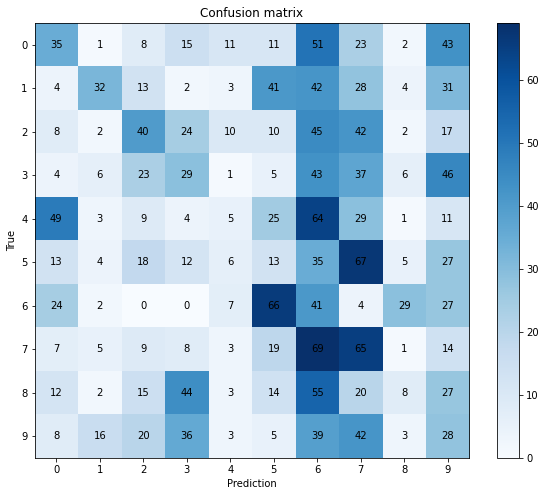

In [59]:
acc, _ = get_metrics(preds, met="max", plot=True);

print("Accuracy on TDGIT with reference as myself = {}%".format(np.round(acc, 2)))

## Accuracy of 14.8% was obtained, classifier looks like it is not generalising the predictions.

# Cross evaluation

Accuracy on jackson speaker data with reference as myself = 10.0%


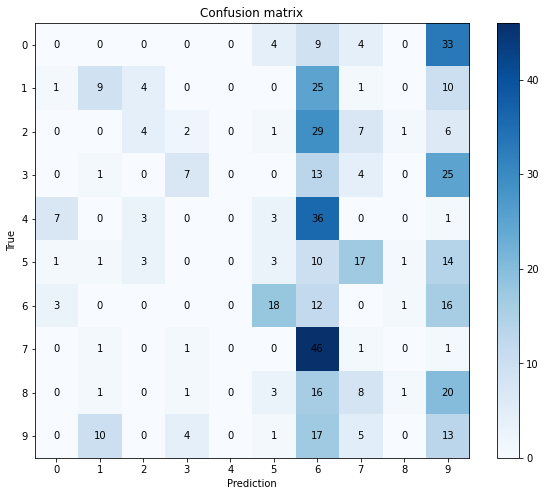

In [48]:
# Myself vs jackson
preds = isolated_digit_recognition(train_data, tdgit['jackson'], frac=1)

acc, _ = get_metrics(preds, met="max", plot=True);

print("Accuracy on jackson speaker data with reference as myself = {}%".format(np.round(acc, 2)))

## Testing jackson speakers performance on my speech data is clearly not performing good. Accuracy is only 10%.

Accuracy on jackson speaker data with reference as jackson = 83.8%


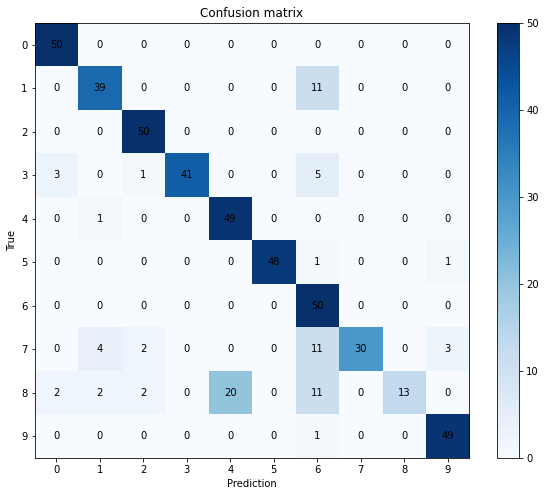

In [49]:
# jackson vs jackson
preds = isolated_digit_recognition(tdgit_train['jackson'], tdgit['jackson'], frac=1)

acc, _ = get_metrics(preds, met="max", plot=True);

print("Accuracy on jackson speaker data with reference as jackson = {}%".format(np.round(acc, 2)))

## Testing jackson speakers performance on jackson data is clearly not performing good. Accuracy is only 83.8%.

Accuracy on nicolas speaker data with reference as yweweler = 45.2%


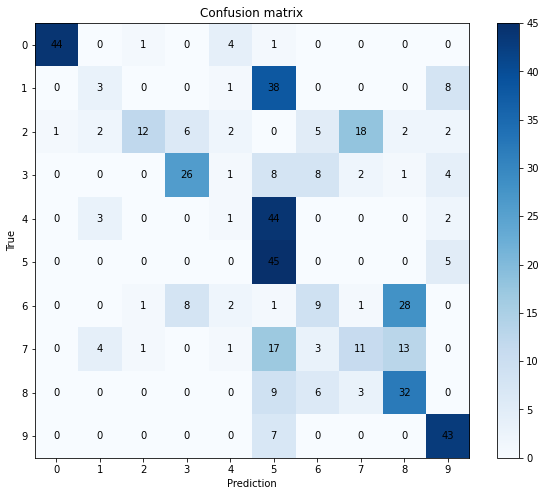

In [51]:
# nicolas vs yweweler
preds = isolated_digit_recognition(tdgit_train['nicolas'], tdgit['yweweler'], frac=1)

acc, _ = get_metrics(preds, met="max", plot=True);

print("Accuracy on nicolas speaker data with reference as yweweler = {}%".format(np.round(acc, 2)))

## Testing yweweler speakers performance on nicolas data is clearly not performing good. Accuracy is only 45.2%.

Accuracy on theo speaker data with reference as theo = 81.2%


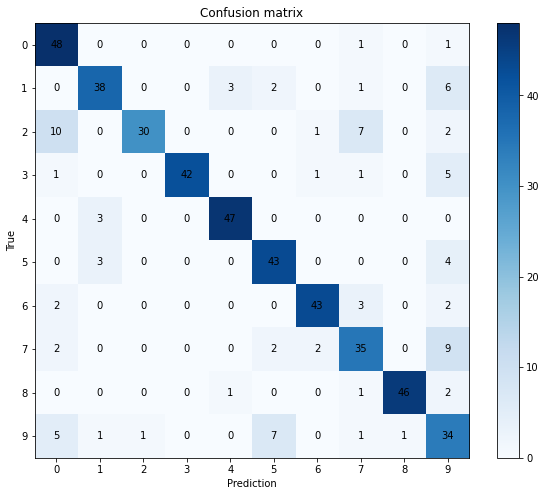

In [52]:
# theo vs theo
preds = isolated_digit_recognition(tdgit_train['theo'], tdgit['theo'], frac=1)

acc, _ = get_metrics(preds, met="max", plot=True);

print("Accuracy on theo speaker data with reference as theo = {}%".format(np.round(acc, 2)))

## Testing theo speakers performance on theo data is clearly not performing good. Accuracy is only 81.2%.

# Report
1. From above experiments we observed that 

| Reference  | Testing  | Accuracy |
|-------------------|----|-------------------|
|Myself|Myself|**90%**|
|Myself|TDGIT|14.8%|
|Myself|Jackson|*10%*|
|Jackson|Jackson|53.8%|
|Nicolas|Yweweler|45.2%|
|Theo|Theo|81.2%|

We see that classifier built is not working properly for different speakers but with same speakers we are able to achieve 90%.
2. MFCC features contain speaker information, we need to choose features which loose speaker information but keep phonetic information. This enhance the digit recognition system performance.
